In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education',
                                     'education-num','marital-status', 'occupation',
                                     'relationship', 'race', 'gender','capital-gain',
                                     'capital-loss', 'hours-per-week', 'native-country',
                                     'income'], sep = ', ', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###### 'education' is the same as 'education-num', but in a different format.
e.g: 'Bachelors' in the 'education' column is represented as "13" in the 'education-num' column. 

###### I don't need both columns to build a model.

###### I could one-hot encode 'education' or scale 'education-num' with a MinMaxScaler()
MinMaxScaler() because 'education-num' seems to be an ordinal variable.
e.g: 'Preschool', the least of the education levels, equates to '1' in 'education-num' while 'Doctorate', the highest of the education levels, equates to '16'.

In [6]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [7]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [8]:
df.groupby('education')['education-num'].value_counts()

education     education-num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: education-num, dtype: int64

###### about 24% of the sample earn more that 50k yearly.

In [9]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [10]:
df.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [11]:
import matplotlib.pyplot as plt

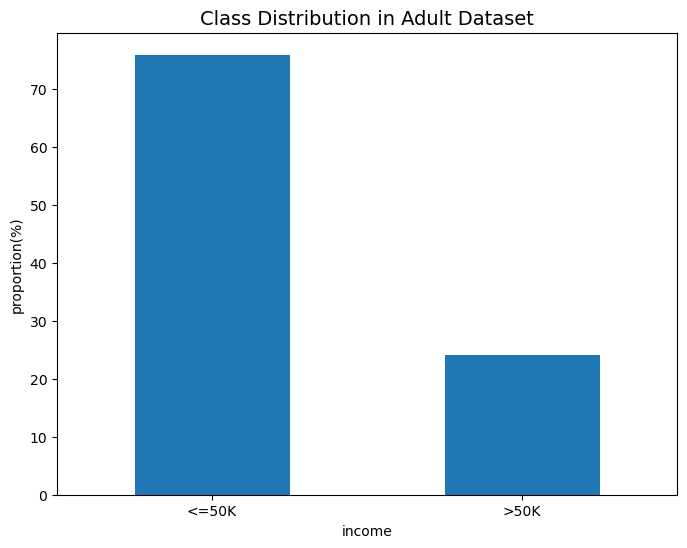

In [12]:
g = df.income.value_counts(normalize=True)*100

plt.figure(figsize=(8, 6))
# colors = {'<=50K': 'green', '>50K': 'red'}
# color_list = [colors[label] for label in g['income']]

ax = g.plot(kind='bar')

# add the legend with increased font size and repositioned
# ax.legend(labels=g['income'].unique(), title='Target', fontsize=12, loc='upper right')

# set the figure size using set_size_inches method
# fig = ax.get_figure()
# fig.set_size_inches(18, 6)
plt.ylabel("proportion(%)")
plt.xlabel("income")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.title('Class Distribution in Adult Dataset', fontsize=14)
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0)
plt.savefig('adultData distribution.png', bbox_inches='tight')

plt.show()

###### 'capital-gain' and/or 'capital-loss' could prove important in differentiating people earning more than 50k a year and those earning less.

###### majority of sample earning the most seem to have made it to at least education-num, 7. i.e: 11th grade

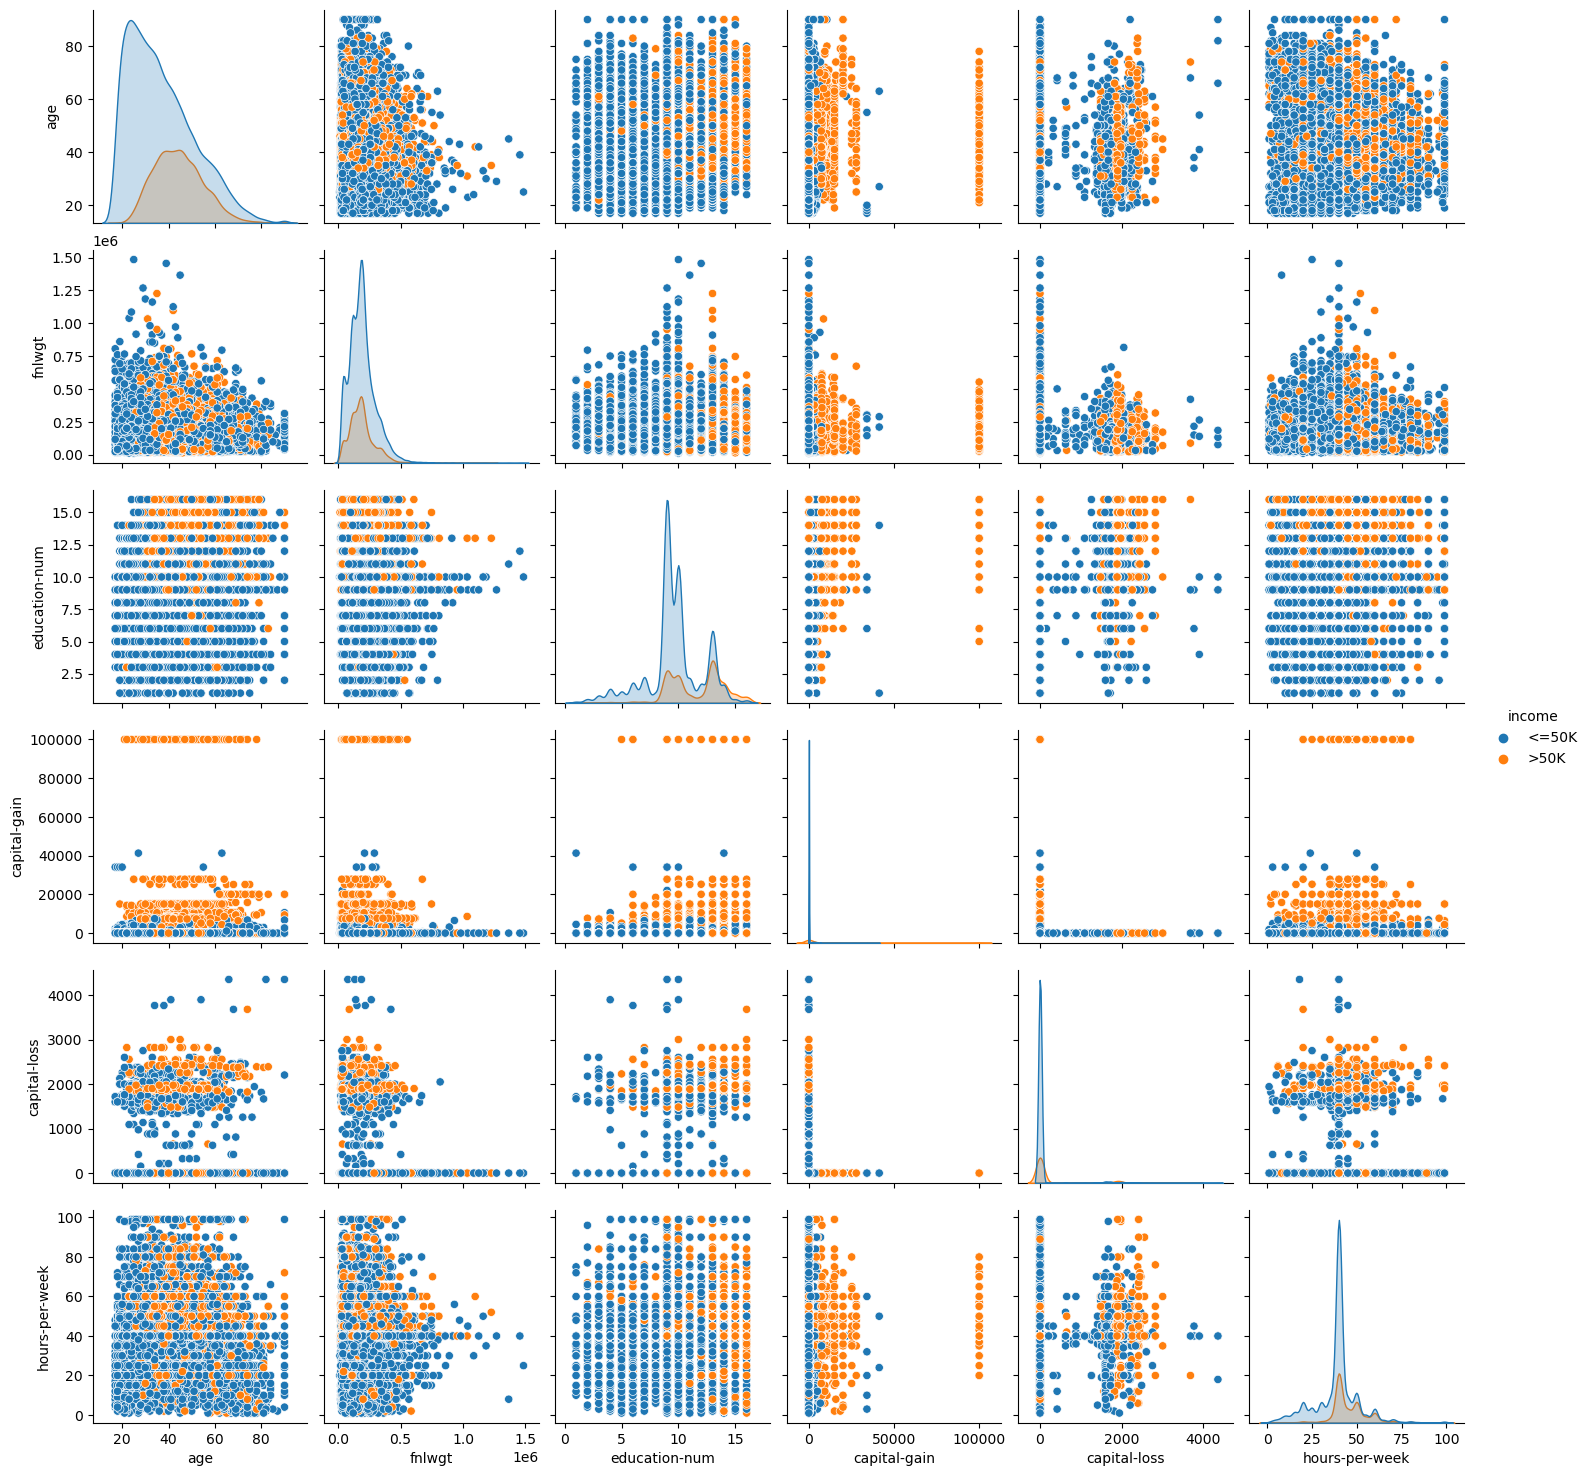

In [14]:
import seaborn as sns
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
sns.pairplot(df[numeric_cols + ['income']], hue = 'income')

In [15]:
import matplotlib.pyplot as plt

###### all 51 people who didn't make it past pre-school don't make more than 50k a year.

###### not more than 10%....of the those who have a max education level of 12th grade...make more than 50k a year.

###### At least 50%  of those with at least a master's degree make more than 50k a year.

<Figure size 800x600 with 0 Axes>

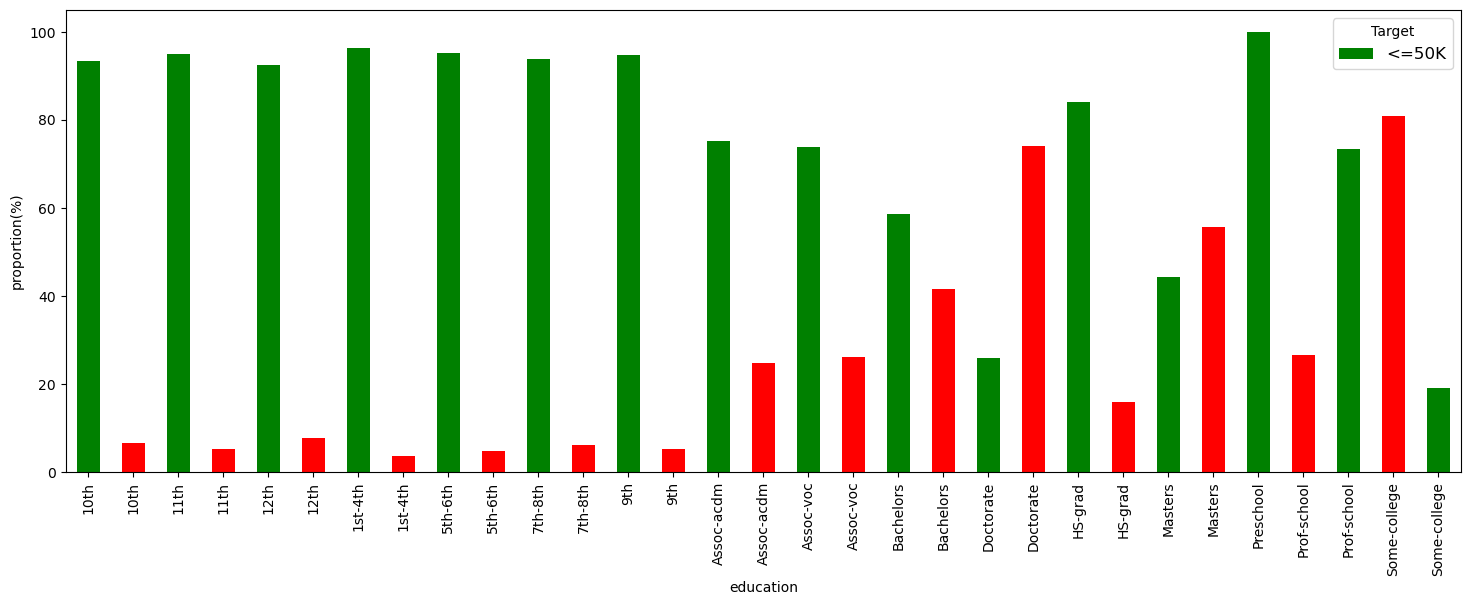

In [13]:
g = df.groupby(['education', 'income']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='proportion')

plt.figure(figsize=(8, 6))
colors = {'<=50K': 'green', '>50K': 'red'}
color_list = [colors[label] for label in ['<=50K', '>50K']]

ax = g.plot(kind='bar', x='education', y='proportion', color=color_list, legend=False)

# add the legend with increased font size and repositioned
ax.legend(labels=g['income'].unique(), title='Target', fontsize=12, loc='upper right')
plt.ylabel("proportion(%)")
plt.xlabel("education")
# set the figure size using set_size_inches method
fig = ax.get_figure()
fig.set_size_inches(18, 6)

plt.show()

# check gender and pay

check job and pay

check hourly rate and pay

In [14]:
df['income'].replace({'<=50K': 0, '>50K': 1}, inplace = True)

<Figure size 800x600 with 0 Axes>

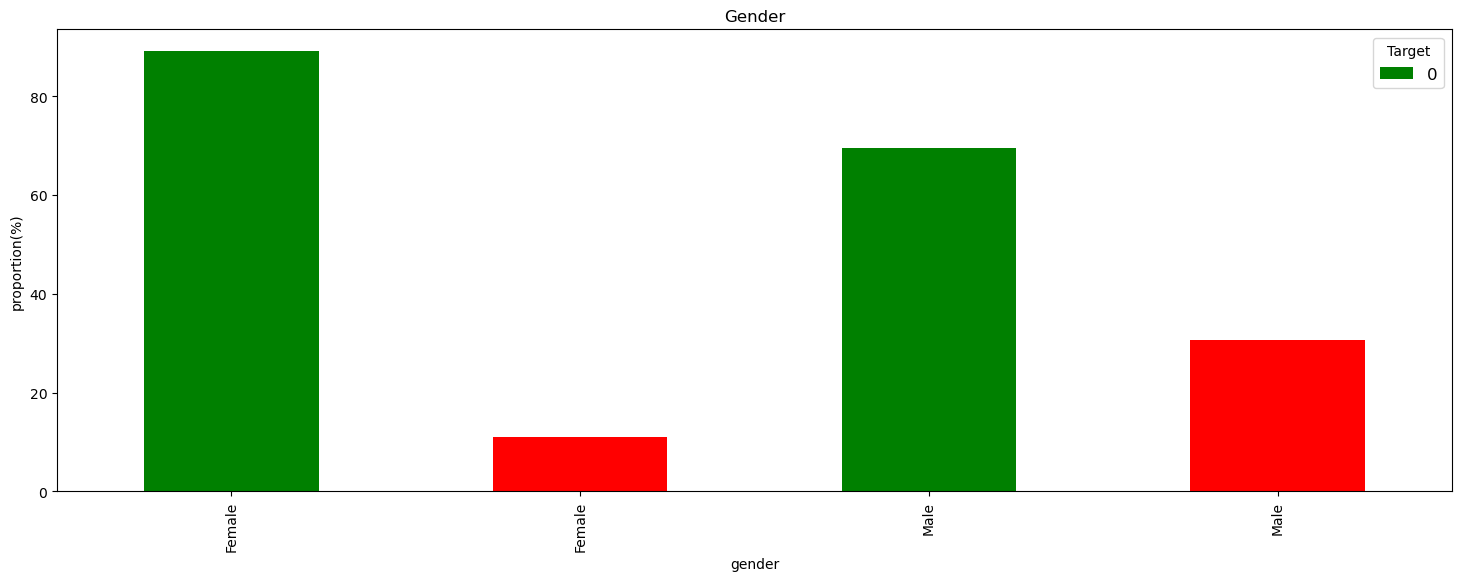

In [15]:
g = df.groupby(['gender', 'income']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='proportion')

plt.figure(figsize=(8, 6))
colors = {'<=50K': 'green', '>50K': 'red'}
color_list = [colors[label] for label in ['<=50K', '>50K']]

ax = g.plot(kind='bar', x='gender', y='proportion', color=color_list, legend=False)

# add the legend with increased font size and repositioned
ax.legend(labels=g['income'].unique(), title='Target', fontsize=12, loc='upper right')
plt.ylabel("proportion(%)")
plt.xlabel("gender")
plt.title("Gender")
# set the figure size using set_size_inches method
fig = ax.get_figure()
fig.set_size_inches(18, 6)

plt.show()

###### as noted earlier, the education level, capital-gain and capital-loss have the strongest correlation with income.

###### hours-per-week and age also have relatively strong correlation with income.

In [17]:
import seaborn as sns

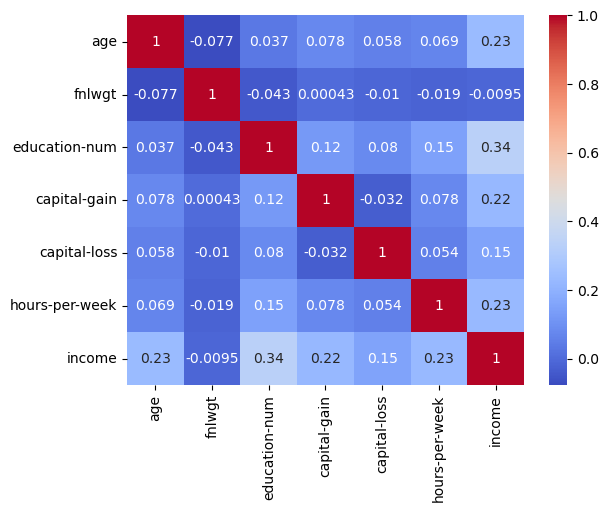

In [18]:
corr = df.corr()

# plot the correlation matrix using heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# show the plot
plt.show()

In [20]:
# distribution = dff.groupby('education')['income'].value_counts(normalize =True)*100

# ax = distribution.plot(kind='bar', color=['blue', 'orange'], alpha=0.8, figsize=(8, 6))
# ax.set_xlabel('Feature')
# ax.set_ylabel('Percentage')
# ax.set_title('Distribution of Target Class by Feature')
# ax.legend(('<=50k', '>50k'), title='Target Class')

# plt.show()

###### the 'workclass', 'occupation' and 'native-country' columns have missing values represented with '?'

In [19]:
for col in df.columns:
        if df[col].dtypes == 'object':
            print({col:df[col].unique()})
            print("\n")

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}


{'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)}


{'marital-status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}


{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)}


{'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
    

###### there are 2399 instances with at least one missing value

In [22]:
df[(df=='?').any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


###### all missing 'workclass' values also lack 'occupation' values

In [23]:
df[df['workclass'] == '?'].shape

(1836, 15)

In [24]:
df[df['occupation'] == '?'].shape

(1843, 15)

In [25]:
df[(df['workclass'] == '?') & (df['occupation'] == '?')].shape

(1836, 15)

In [26]:
df[df['workclass'] == '?'].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390,0.104031
std,20.334587,107089.902252,2.601986,5147.323872,354.685264,14.909903,0.305383
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,117771.250000,9.000000,0.000000,0.000000,20.000000,0.000000
50%,35.000000,175617.000000,9.000000,0.000000,0.000000,36.000000,0.000000
75%,61.000000,234568.500000,10.000000,0.000000,0.000000,40.000000,0.000000
max,90.000000,981628.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


###### the remaining 7 instances with occupation = '?' are all the people who 'never-worked' but surprisingly the 'hours-per-week' is greater than 0.

###### also, most of them have a 'relationship' == 'Own-child' with the head of the house.

In [27]:
df[(df['workclass'] != '?') & (df['occupation'] == '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,0
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,0
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,0
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,0


all instances of 'workclass' == 'never-worked'

In [28]:
df[df['workclass'] == 'Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,0
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,0
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,0
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,0


###### 'native-country' accounts for all the remaining 556 instances with missing values

In [29]:
df[(df=='?').any(axis=1) & (df['workclass'] != '?') & (df['occupation'] != '?')].race.value_counts()

White                 368
Black                  92
Asian-Pac-Islander     79
Other                  17
Name: race, dtype: int64

###### I was tempted to assume that all 'White' race instances were Americans but I'm not so sure anymore.

In [30]:
grouped = df.groupby(['native-country', 'race']).agg({'race': 'count'}).rename(columns={'race': 'count'}).reset_index()
grouped['proportion'] = grouped.groupby('native-country')['count'].apply(lambda x: 100 * x / x.sum())

# add a column for the total number of instances in race
# grouped['total_race'] = grouped.groupby('race')['count'].transform('sum')

# add a column for the total number of instances in native-country
grouped['total_country'] = grouped.groupby('native-country')['count'].transform('sum')


grouped[grouped['race'] == 'White'].sort_values('proportion', ascending=False)

,native-country,race,count,proportion,total_country
111,Yugoslavia,White,16,100.000000,16
92,Scotland,White,12,100.000000,12
58,Italy,White,73,100.000000,73
48,Hungary,White,13,100.000000,13
42,Holand-Netherlands,White,1,100.000000,1
8,Canada,White,119,98.347107,121
84,Poland,White,59,98.333333,60
86,Portugal,White,36,97.297297,37
78,Peru,White,30,96.774194,31
37,Greece,White,28,96.551724,29


##### I've chosen to drop all the instances with missing data

##### there are 30,162 data points with no unknown values

In [20]:
dfNew = df[(df!='?').all(axis=1)].reset_index(drop=True)
dfNew.shape

(30162, 15)

###### the class distribution in the 'income' column is not too different....with about a 0.8% increase in the '>50k' label.

In [32]:
dfNew.income.value_counts(normalize=True)

0    0.751078
1    0.248922
Name: income, dtype: float64

In [33]:
dfNew.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [88]:
dfNew.drop('education', axis=1, inplace=True)

In [89]:
dfNew

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


ct = make_column_transformer(
    (StandardScaler(),['age', 'fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']),
    (OneHotEncoder(sparse=False, handle_unknown='ignore'), ['workclass','marital-status','occupation','relationship','race','gender','native-country']),
    (MinMaxScaler(), ['education-num']))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data_features = dfNew.drop(["income"], axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, dfNew.income,test_size=0.2, random_state=26, stratify = dfNew.income)

In [24]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24129, 87)


In [25]:
X_test_trans = ct.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

# DT

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Create a parameter grid to search over
param_grid = {
    
    'max_depth': [None, 5, 10]
}

# Define a custom scorer based on f1-score
# scorer = make_scorer(f1_score)
skf = StratifiedKFold(n_splits=5)

# Create a GridSearchCV object and fit it to the data
clf_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_tree, param_grid,  cv=skf, scoring = 'f1' )
grid_search.fit(X_train_trans, y_train)

# Get the best estimator and its corresponding f1-score on the test data
best_clf_tree = grid_search.best_estimator_
y_pred_tree = best_clf_tree.predict(X_test_trans)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4531
           1       0.78      0.60      0.68      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.77      0.79      6033
weighted avg       0.85      0.86      0.85      6033



MinMaxScaler on education-num did better than One-hot encoder on education by about 0.2 f1-score on training data for decision tree

In [117]:
best_clf_tree

DecisionTreeClassifier(max_depth=10)

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

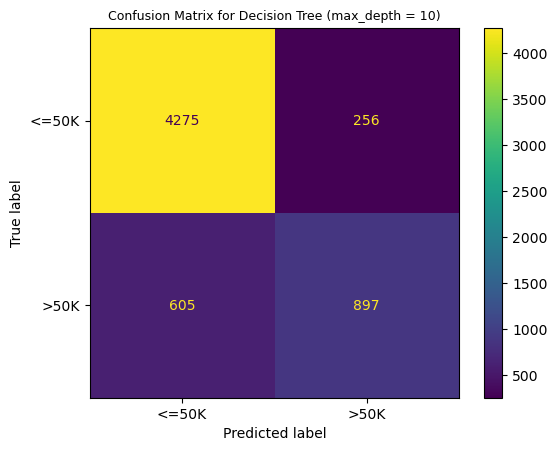

In [30]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=["<=50K", ">50K"])

disp.plot()
plt.title('Confusion Matrix for Decision Tree (max_depth = 10)', fontsize=9)
# plt.savefig('decision tree confusion matrix.png', bbox_inches='tight')
plt.show()

In [31]:
from sklearn.metrics import precision_recall_curve

In [33]:
import numpy as np

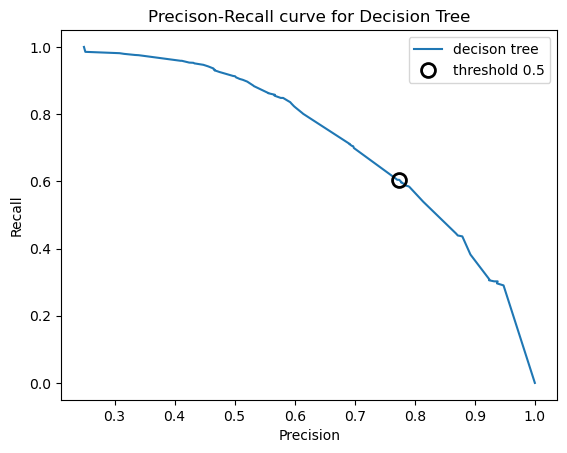

In [34]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(
    y_test, best_clf_tree.predict_proba(X_test_trans)[:, 1])

plt.plot(precision_tree, recall_tree, label="decison tree")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', c='k',
         markersize=10, label="threshold 0.5", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Precison-Recall curve for Decision Tree")
# plt.savefig('decision tree precision-recall curve.png', bbox_inches='tight')
plt.show()

###### the decision tree thinks being married to a spouse in the millitary or not is a key decider for who earns greater than 50K ayear and who doesn't

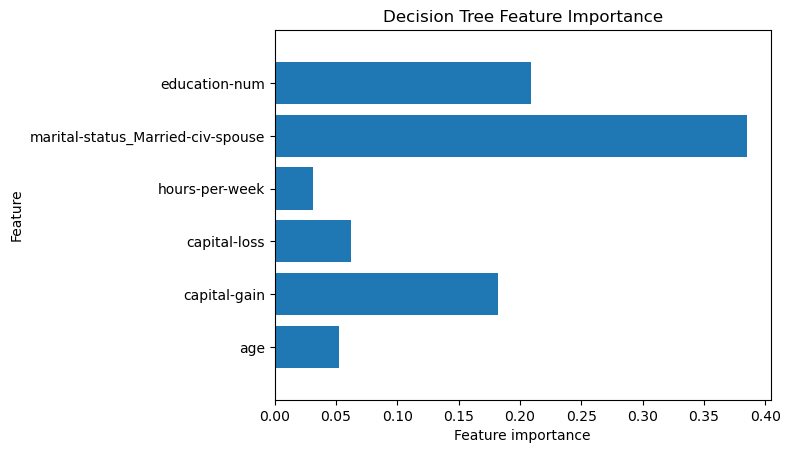

In [35]:
column_names = []

for transformer_name, transformer, columns in ct.transformers_:
    if transformer_name != 'remainder':
        feature_names = transformer.get_feature_names_out(columns)
        for i, column in enumerate(columns):
            for prefix in ['standardscaler__', 'minmaxscaler__', 'onehotencoder__']:
                if column.startswith(prefix):
                    feature_names[i] = feature_names[i].replace(prefix, '', 1)
        column_names.extend(feature_names)

# print(column_names)
def plot_feature_importances(model):
    featGzero = np.where(model.feature_importances_ >0.025)
    n_features = len(featGzero[0])
    featImp = model.feature_importances_
    plt.barh(np.arange(n_features), np.array([featImp[i] for i in featGzero]).flatten(), align='center')
    plt.yticks(np.arange(n_features), np.array([column_names[i] for i in featGzero[0]]).flatten())
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Decision Tree Feature Importance")
#     plt.savefig("Decision Tree Feature Importance.png", bbox_inches='tight')
    plt.show()

plot_feature_importances(best_clf_tree)

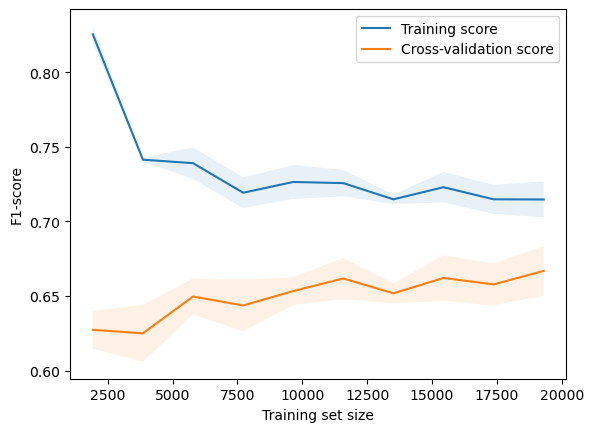

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_digits
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# Load the digits dataset
# digits = load_digits()

skf = StratifiedKFold(n_splits=5)

# Split the data into training and test sets of varying sizes
train_sizes, train_scores, test_scores = learning_curve(
    estimator=DecisionTreeClassifier(max_depth=10),
    X=X_train_trans, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=skf, scoring='f1', n_jobs=3
)

# Compute the mean and standard deviation of the performance metrics at each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.legend()
plt.show()

# KNN

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score


param_grid = {
    
    'n_neighbors': [3,5,7,9]
}

# scorer = make_scorer(precision_score)

clf_knn = KNeighborsClassifier()
grid_search = GridSearchCV(clf_knn, param_grid, scoring = 'f1', cv=skf)
grid_search.fit(X_train_trans, y_train)

# Get the best estimator and its corresponding f1-score on the test data
best_clf_knn = grid_search.best_estimator_
y_pred_knn = best_clf_knn.predict(X_test_trans)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4531
           1       0.68      0.61      0.64      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



In [39]:
best_clf_knn

KNeighborsClassifier(n_neighbors=9)

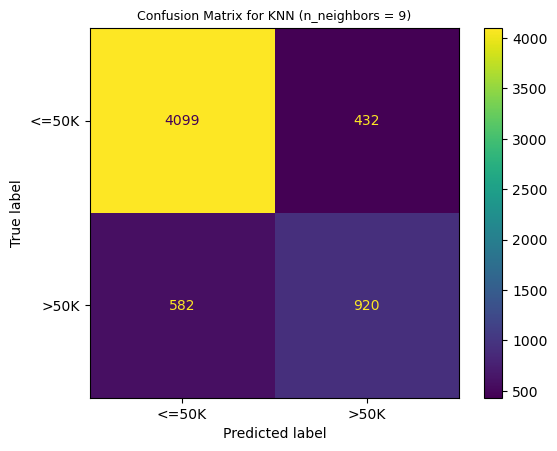

In [40]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=["<=50K", ">50K"])

disp.plot()
plt.title('Confusion Matrix for KNN (n_neighbors = 9)', fontsize=9)
# plt.savefig('decision tree confusion matrix.png', bbox_inches='tight')
plt.show()

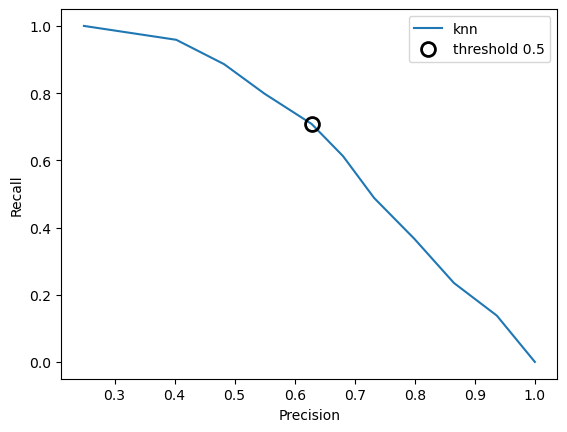

In [41]:
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(
    y_test, best_clf_knn.predict_proba(X_test_trans)[:, 1])

plt.plot(precision_knn, recall_knn, label="knn")
close_default_knn = np.argmin(np.abs(thresholds_knn - 0.5))
plt.plot(precision_knn[close_default_knn], recall_knn[close_default_knn], 'o', c='k',
         markersize=10, label="threshold 0.5", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

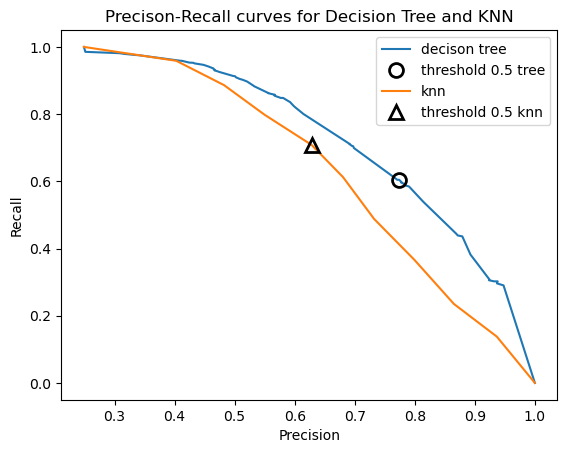

In [42]:
plt.plot(precision_tree, recall_tree, label="decison tree")

plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', c='k',
         markersize=10, label="threshold 0.5 tree", fillstyle="none", mew=2)


plt.plot(precision_knn, recall_knn, label="knn")

plt.plot(precision_knn[close_default_knn], recall_knn[close_default_knn], '^', c='k',
         markersize=10, label="threshold 0.5 knn", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Precison-Recall curves for Decision Tree and KNN")
plt.savefig('decision tree and knn precision-recall curve.png', bbox_inches='tight')
plt.show()

In [118]:
# from sklearn.metrics import roc_curve
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_clf.predict_proba(X_test_trans)[:, 1])

# # plt.plot(fpr, tpr, label="ROC Curve SVC")
# plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

# plt.xlabel("FPR")
# plt.ylabel("TPR (recall)")
# # plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
# #          label="threshold zero SVC", fillstyle="none", c='k', mew=2)
# close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
# plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
#          label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

# plt.legend(loc=4)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4531
           1       0.78      0.60      0.68      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.77      0.79      6033
weighted avg       0.85      0.86      0.85      6033



In [44]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4531
           1       0.68      0.61      0.64      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



In [51]:
# from sklearn.svm import SVC

# # Create a parameter grid to search over
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# # Create a stratified k-fold object
# skf = StratifiedKFold(n_splits=5)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=skf, scoring=scorer)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train_trans, y_train)

# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test_trans)
# f1 = f1_score(y_test, y_pred)
# f1

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# # from sklearn.datasets import load_digits
# # from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import learning_curve

# # Load the digits dataset
# # digits = load_digits()

# skf = StratifiedKFold(n_splits=5)

# # Split the data into training and test sets of varying sizes
# train_sizes, train_scores, test_scores = learning_curve(
#     estimator=KNeighborsClassifier(n_neighbors=9),
#     X=X_train_trans, y=y_train,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     cv=skf, n_jobs=3, scoring='f1'
# )

# # Compute the mean and standard deviation of the performance metrics at each training size
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plot the learning curve
# plt.plot(train_sizes, train_mean, label='Training score')
# plt.plot(train_sizes, test_mean, label='Cross-validation score')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
# plt.xlabel('Training set size')
# plt.ylabel('F1-score')
# plt.legend()
# plt.show()